# 第7章: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．



## 60. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度

“United States”と”U.S.”のコサイン類似度を計算せよ．

In [2]:
import numpy as np

def cos_sim(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

print(cos_sim(model["United_States"], model["U.S."]))
print(model.similarity('United_States','U.S.'))

0.7310775
0.7310774


## 62. 類似度の高い単語10件

“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [3]:
model.most_similar('United_States',topn=10)

[('Unites_States', 0.7877249717712402),
 ('Untied_States', 0.7541371583938599),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178409457206726),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019068956375122)]

## 63. 加法構成性によるアナロジー

“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [4]:
model.most_similar(positive=['Spain','Athens'], negative=['Madrid'],topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.5606847405433655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.5450685620307922),
 ('Ioannis_Christou', 0.5400863289833069),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791338920593)]

## 64. アナロジーデータでの実験

[単語アナロジー](http://download.tensorflow.org/data/questions-words.txt)の評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [5]:
with open("questions-words.txt") as f1:
    lines = f1.readlines()
    with open("questions-words_ans.txt", "w") as f2:
        for i, line in enumerate(lines):
            words = line.split()
            if len(words) == 4:
                word, cos = model.most_similar(positive=[words[1],words[2]], negative=[words[0]], topn=1)[0]
                words += [word, str(cos)]
                output = " ".join(words)+"\n"
            else:
                output = line
            f2.write(output)
            if (i+1)%1000 == 0:
                print("Finished %d/%d" %(i+1, len(lines)))
        print("Finished %d/%d" %(i+1, len(lines)))

Finished 1000/19558
Finished 2000/19558
Finished 3000/19558
Finished 4000/19558
Finished 5000/19558
Finished 6000/19558
Finished 7000/19558
Finished 8000/19558
Finished 9000/19558
Finished 10000/19558
Finished 11000/19558
Finished 12000/19558
Finished 13000/19558
Finished 14000/19558
Finished 15000/19558
Finished 16000/19558
Finished 17000/19558
Finished 18000/19558
Finished 19000/19558
Finished 19558/19558


## 65. アナロジータスクでの正解率

64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [7]:
#カテゴリ前半意味的アナロジー5つ、後半文法的アナロジー9つ
#文法的アナロジーはカテゴリが「gram~~」となっている。

accu = 0
count = 0
semantic = True

with open("questions-words_ans.txt") as f:
    for line in f:
        line = line.split()
        if len(line) == 6:
            count += 1
            if line[3] == line[4]:
                accu += 1
        elif "gram" in line[1] and semantic:
            sem_accu = accu
            sem_count = count
            semantic = False

print("意味的アナロジー正解率 :", sem_accu/sem_count)
print("文法的アナロジー正解率 :", accu/count)

意味的アナロジー正解率 : 0.7308602999210734
文法的アナロジー正解率 : 0.7358780188293083


## 66. WordSimilarity-353での評価

[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [8]:
import pandas as pd

data = pd.read_csv("wordsim353/combined.csv")
cos = []
for i in range(len(data)):
    tmp = data.iloc[i]
    cos.append(model.similarity(tmp["Word 1"], tmp["Word 2"]))

data["cos"] = cos
data[["Human (mean)", "cos"]].corr(method='spearman')

,Human (mean),cos
Human (mean),1.000000,0.700017
cos,0.700017,1.000000


## 67. k-meansクラスタリング

国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [9]:
#カテゴリ名
#capital-common-countries, capital-world(2列目に国名) -> kind = 2
#currency, gram6-nationality-adjective（1列目に国名) -> kind = 1
#それ以外 -> kind = 0

kind = 0
countries = set()

with open("questions-words.txt") as f:
    for line in f:
        line = line.split()
        if len(line) == 4:
            if kind:
                countries.add(line[kind-1])
        elif line[1] in ["capital-common-countries", "capital-world"]:
            kind = 2
        elif line[1] in ["currency", "gram6-nationality-adjective"]:
            kind = 1
        else:
            kind = 0
            
# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]

In [10]:
from sklearn.cluster import KMeans

countries = list(countries)
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)

cluster = [[], [], [], [], []]

for i in range(len(countries)):
    cluster[kmeans.labels_[i]].append(countries[i])
    
print("\n------------------------------------\n".join([", ".join(lst) for lst in cluster]))

Iraq, Malaysia, Jordan, Qatar, Oman, India, Nepal, Australia, Philippines, USA, Pakistan, Thailand, Egypt, Syria, Canada, Taiwan, Samoa, Vietnam, Laos, Indonesia, Korea, Greenland, Tuvalu, Morocco, Afghanistan, Lebanon, Libya, Cambodia, Bangladesh, China, Fiji, Bhutan, Japan, Israel, Iran, Bahrain
------------------------------------
Turkmenistan, Azerbaijan, Kazakhstan, Turkey, Moldova, Ukraine, Armenia, Bulgaria, Belarus, Kyrgyzstan, Uzbekistan, Tajikistan, Georgia, Albania, Russia, Macedonia
------------------------------------
Colombia, Mexico, Venezuela, Honduras, Peru, Chile, Nicaragua, Uruguay, Belize, Guyana, Cuba, Dominica, Bahamas, Argentina, Ecuador, Brazil, Jamaica, Suriname
------------------------------------
Zimbabwe, Mali, Burundi, Mauritania, Botswana, Namibia, Algeria, Malawi, Nigeria, Tunisia, Guinea, Madagascar, Senegal, Gabon, Zambia, Somalia, Angola, Sudan, Niger, Ghana, Gambia, Uganda, Eritrea, Rwanda, Kenya, Mozambique, Liberia
----------------------------------

## 68. Ward法によるクラスタリング

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

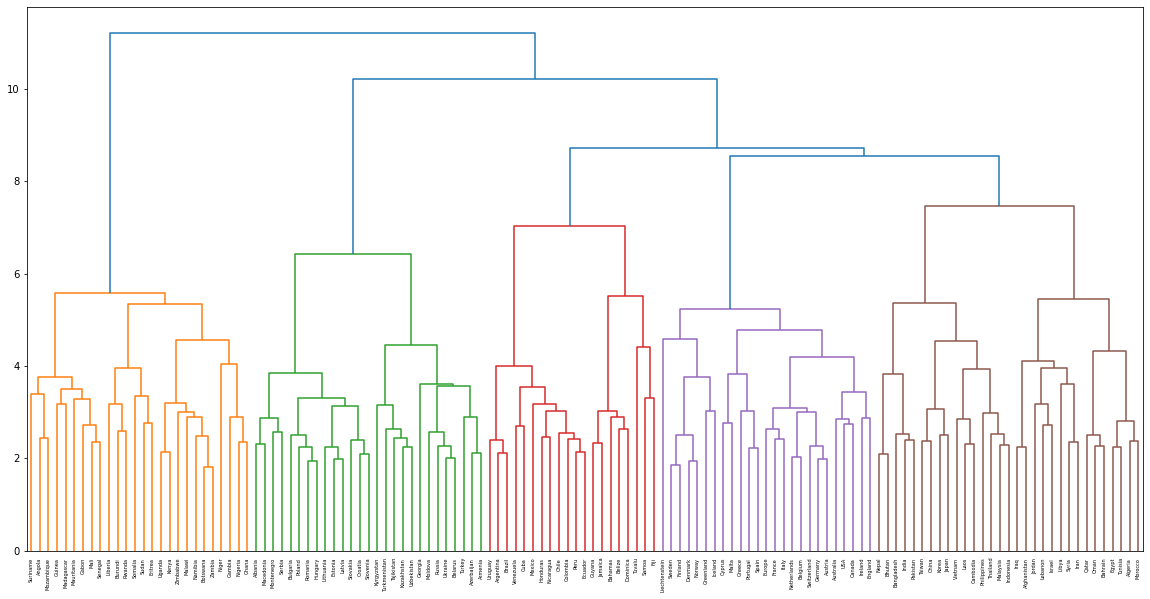

In [11]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram

plt.figure(figsize=(20, 10))
link = linkage(countries_vec,'ward')
dendrogram(link, labels=countries)
plt.show()

## 69. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

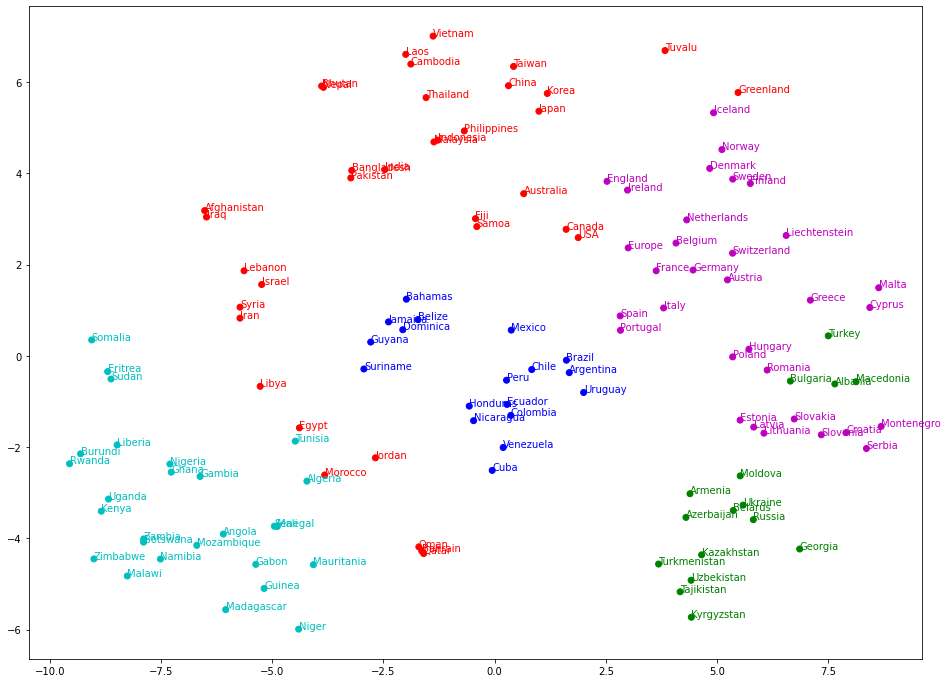

In [12]:
import bhtsne

color = ["r", "g", "b", "c", "m"]
c = [color[clus] for clus in kmeans.labels_]

vec_embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2)

plt.figure(figsize=(16, 12))
plt.scatter(np.array(vec_embedded).T[0], np.array(vec_embedded).T[1], color=c)
for i, (x, y) in enumerate(vec_embedded):
    plt.annotate(countries[i], (x, y), color=c[i])
plt.show()